In [30]:
# Libraries
import mne
import matplotlib.pyplot as plt

# 1. Define the path to the .vhdr file

In [31]:
vhdr_file = "C:\\Users\\indira.lavocat\\MOVIDOC\\EEG\\Indira Test\\MOVIDOCTicTrack000005.vhdr"

# 2. Load the data

In [32]:
raw = mne.io.read_raw_brainvision(vhdr_file, preload=True)
raw.set_montage("standard_1020") # to prevent error during the topography step
print(raw)
print(raw.info)

Extracting parameters from C:\Users\indira.lavocat\MOVIDOC\EEG\Indira Test\MOVIDOCTicTrack000005.vhdr...
Setting channel info structure...
Reading 0 ... 79759  =      0.000 ...   159.518 secs...
<RawBrainVision | MOVIDOCTicTrack000005.eeg, 31 x 79760 (159.5 s), ~18.9 MiB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, P7, ...
 chs: 31 EEG
 custom_ref_applied: False
 dig: 34 items (3 Cardinal, 31 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2025-05-13 16:30:12 UTC
 nchan: 31
 projs: []
 sfreq: 500.0 Hz
>


C:\Users\indira.lavocat\AppData\Local\Temp\ipykernel_7416\4102891873.py:1: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_file, preload=True)


# 3. Quick plot

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


c:\Users\indira.lavocat\AppData\Local\miniforge3\envs\mne_env\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


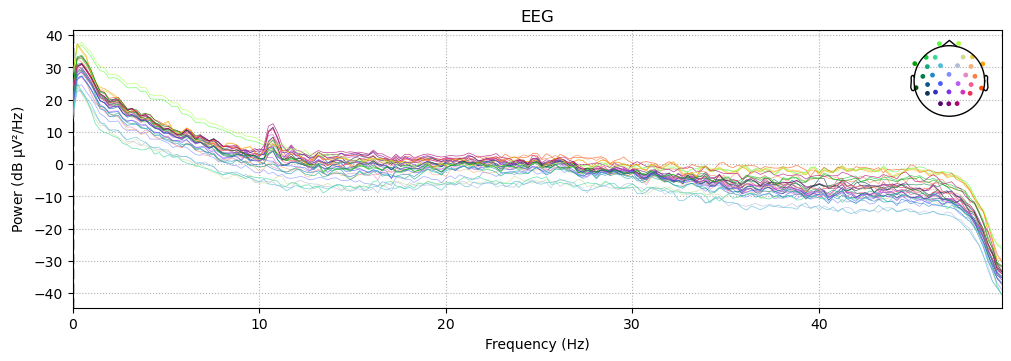

Channels marked as bad:
none


In [21]:
raw.plot(duration=5, n_channels=30)
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)

# 5. Extract the events (from the .vmrk annotations)

In [ ]:
events, event_id = mne.events_from_annotations(raw)
print("Événements détectés :", event_id)

# 5. OPTION

In [ ]:
print(events)

In [ ]:
print(raw.annotations)

In [ ]:
events, event_id = mne.events_from_annotations(raw)
print("Événements détectés :", event_id)

In [ ]:
print(raw.times[0], raw.times[-1])
print(raw.times[-1] - raw.times[0])

# 4. Filter the data

In [22]:
raw.filter(l_freq=1., h_freq=30.) # for ERPs, [1-30] Hz band-pass filter

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


<RawBrainVision | MOVIDOCTicTrack000005.eeg, 31 x 79760 (159.5 s), ~18.9 MiB, data loaded>

# 6. Seperation in epochs

Not setting metadata
54 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 54 events and 501 original time points ...
1 bad epochs dropped


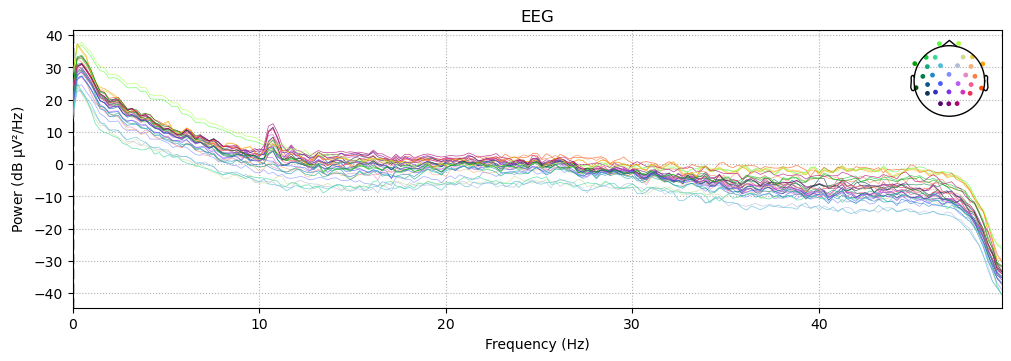

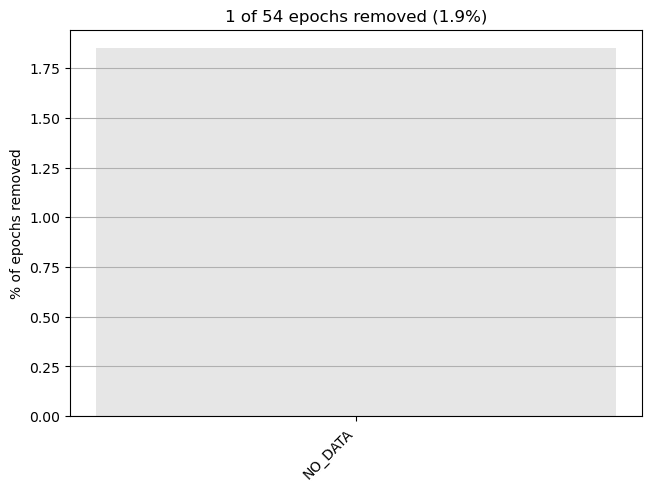

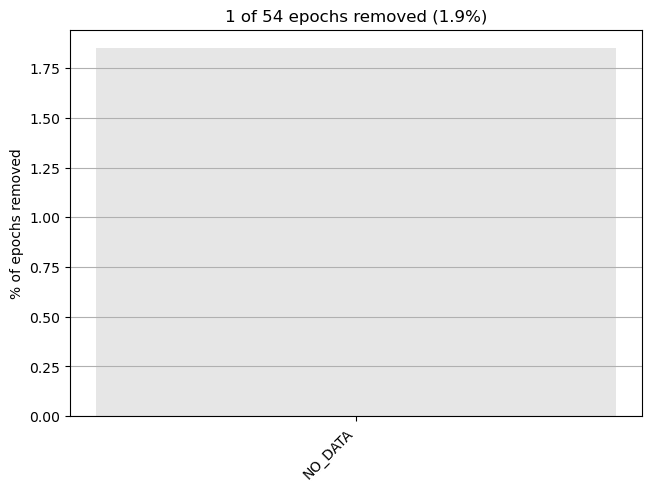

In [24]:
tmin = -0.2  # 200 ms before the event
tmax = 0.8   # 800 ms after the event
epochs = mne.Epochs(raw, events, event_id=event_id,
                    tmin=tmin, tmax=tmax, baseline=(None, 0),
                    preload=True)
epochs.plot_drop_log()

# 7. Define an automatic reject of the artifacts (optional)

In [ ]:
# epochs.plot_drop_log()
# epochs.drop_bad()

# 8. Averaging (ERP)

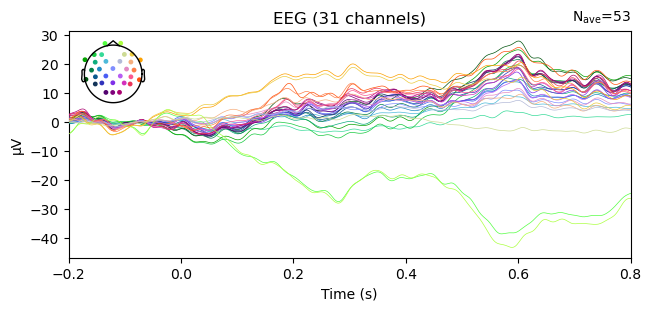

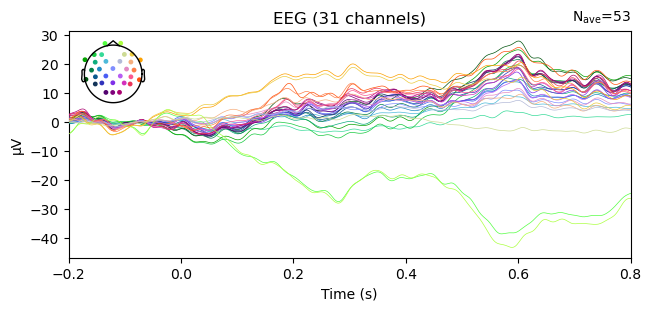

In [25]:
evoked = epochs.average()
# evoked.plot(title="ERP (moyenne des epochs)")
evoked.plot() # evoked does not accept any "title"

# To add a title to the graph
# fig = evoked.plot_image(picks='eeg')
# fig.suptitle("ERP (moyenne des epochs)")


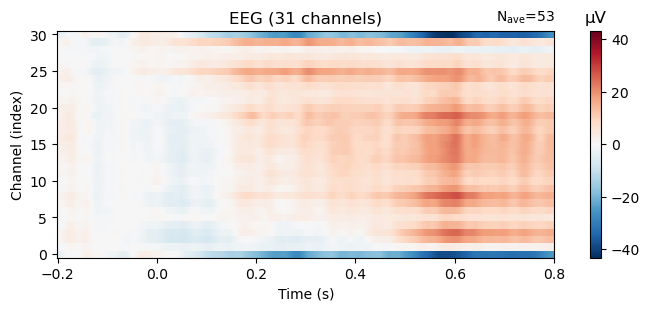

Text(0.5, 0.98, 'ERP (moyenne des epochs)')

In [26]:
# To add a title to the graph
fig = evoked.plot_image(picks='eeg')
fig.suptitle("ERP (moyenne des epochs)")

# 9. Topography

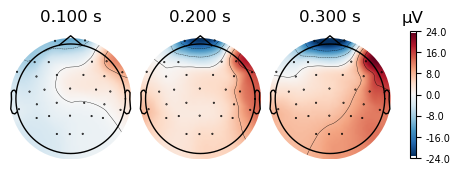

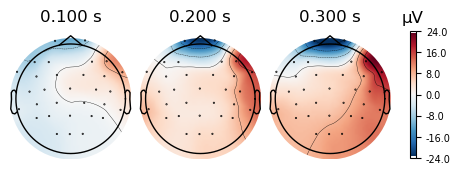

In [27]:
# evoked.plot_topomap(times=[0.1, 0.2, 0.3], ch_type='eeg', title="Topomap à 100/200/300 ms")
evoked.plot_topomap(times=[0.1, 0.2, 0.3], ch_type='eeg')

*** Show the Data ***

In [29]:
plt.show()